In [ ]:
# =============================
# STEP 1 — Import Libraries
# =============================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
# =============================
# STEP 2 — Upload File (Colab)
# =============================
from google.colab import files

print("🔹 Please upload your house pricing CSV file:")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
print(f"\n✅ Uploaded file: {file_name}")

data = pd.read_csv(file_name)

print("\n🔹 First 5 rows of your dataset:")
data.head()


🔹 Please upload your house pricing CSV file:


Saving housing123.csv to housing123 (2).csv

✅ Uploaded file: housing123 (2).csv

🔹 First 5 rows of your dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# =============================
# STEP 3 — Show Columns
# =============================
print("\n🔹 Columns available in the dataset:\n")
for i, col in enumerate(data.columns):
    print(f"{i}. {col}")

choice = input("\n✏️ Type the column *name* for price OR type the *index number* (e.g., 2): ")

# Try to interpret as index number
try:
    idx = int(choice)
    price_col = data.columns[idx]
    print(f"✔ Selected by index: {price_col}")
except:
    price_col = choice
    print(f"✔ Selected by name: {price_col}")

# Check if that column exists
if price_col not in data.columns:
    raise Exception(f"❌ Column '{price_col}' not found in dataset — check spelling/case.")

print(f"\n➡ Price column set to: {price_col}")




🔹 Columns available in the dataset:

0. price
1. area
2. bedrooms
3. bathrooms
4. stories
5. mainroad
6. guestroom
7. basement
8. hotwaterheating
9. airconditioning
10. parking
11. prefarea
12. furnishingstatus

✏️ Type the column *name* for price OR type the *index number* (e.g., 2): 3
✔ Selected by index: bathrooms

➡ Price column set to: bathrooms



✅ Created price categories!
PriceCategory
Low    545
Name: count, dtype: int64

✅ Random Forest model trained successfully!

📊 Accuracy: 1.0

📊 Confusion Matrix:
 [[109]]

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


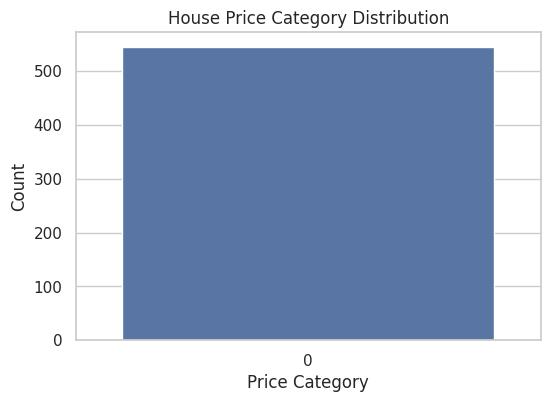

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


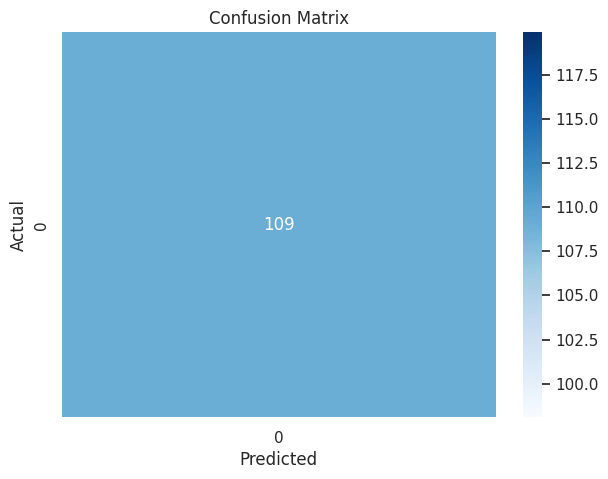

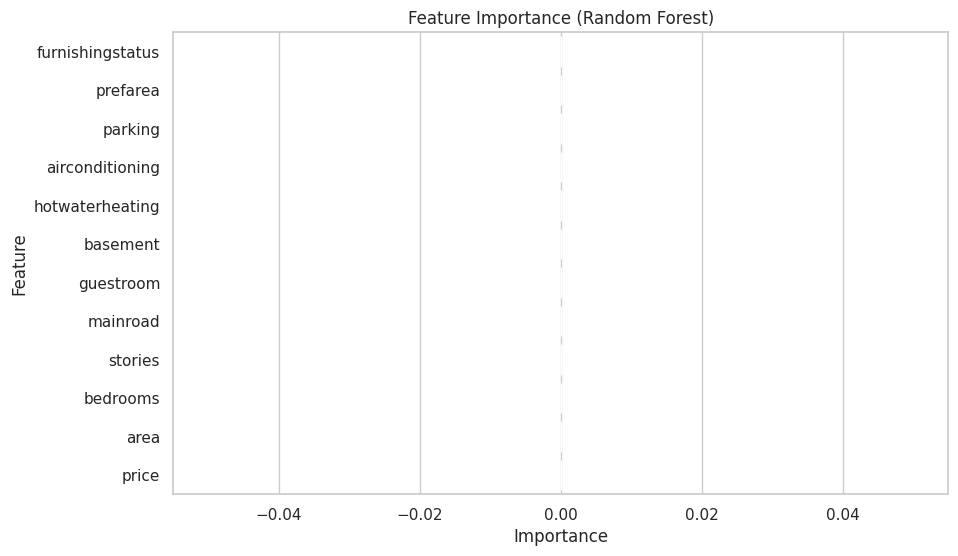

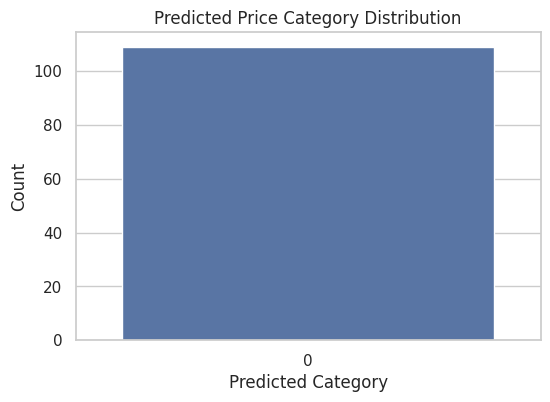

In [ ]:
# =============================
# STEP 4 — Handle Missing Values
# =============================
data.fillna(data.mean(numeric_only=True), inplace=True)

for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# =============================
# STEP 5 — Price Categorization
# =============================
def price_category(val):
    if val < 50000:
        return "Low"
    elif val < 100000:
        return "Medium"
    else:
        return "High"

data["PriceCategory"] = data[price_col].apply(price_category)

print("\n✅ Created price categories!")
print(data["PriceCategory"].value_counts())

# =============================
# STEP 6 — Encode Categorical Columns
# =============================
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

# =============================
# STEP 7 — Features & Target
# =============================
X = data.drop([price_col, "PriceCategory"], axis=1)
y = data["PriceCategory"]

# =============================
# STEP 8 — Train/Test Split
# =============================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =============================
# STEP 9 — Feature Scaling
# =============================
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# =============================
# STEP 10 — Train Model
# =============================
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("\n✅ Random Forest model trained successfully!")

# =============================
# STEP 11 — Predictions & Evaluation
# =============================
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)

print("\n📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# =============================
# STEP 12 — Visualization
# =============================
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("House Price Category Distribution")
plt.xlabel("Price Category")
plt.ylabel("Count")
plt.show()

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature importances
importances = model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=feat_names[indices])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Prediction distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y_pred)
plt.title("Predicted Price Category Distribution")
plt.xlabel("Predicted Category")
plt.ylabel("Count")
plt.show()
